## Welcome to Pandas: Data Structures

### How can I create a DataFrame object in Pandas?

#### What is a DataFrame?

The **DataFrame** data structure in Pandas is a <i>two-dimensional labeled array</i>. 

* Data in the array can be of any type (integers, strings, floating point numbers, Python objects, etc.). 
* Data within each column is homogeneous
* By default Pandas creates a numerical index for the rows in sequence 0...n
    
<img src="files/images/df1.jpg">

Here's an example where we have set the Dates column to be the index and label for the rows. 

<img src="files/images/df2.jpg">


#### Preliminaries - import pandas and datetime library; create data for populating our first dataframe object

In [2]:
import pandas as pd
import datetime


In [3]:
# create a list containing dates from 12-01 to 12-07
dt = datetime.datetime(2017,12,1)
end = datetime.datetime(2017,12,8)
step = datetime.timedelta(days=1)
dates = []

In [4]:
# populate the list
while dt < end:
    dates.append(dt.strftime('%m-%d'))
    dt += step

In [5]:
dates

['12-01', '12-02', '12-03', '12-04', '12-05', '12-06', '12-07']

In [6]:
d = {'Date': dates, 'Tokyo' : [15,19,15,11,9,8,13], 'Paris': [-2,0,2,5,7,-5,-3], 'Mumbai':[20,18,23,19,25,27,23]}

In [56]:
d

{'Date': ['12-01', '12-02', '12-03', '12-04', '12-05', '12-06', '12-07'],
 'Mumbai': [20, 18, 23, 19, 25, 27, 23],
 'Paris': [-2, 0, 2, 5, 7, -5, -3],
 'Tokyo': [15, 19, 15, 11, 9, 8, 13]}

#### Example 1: Create Dataframe Object from a Python Dictionary of equal length lists

In [57]:
temps = pd.DataFrame(d)
print temps

    Date  Mumbai  Paris  Tokyo
0  12-01      20     -2     15
1  12-02      18      0     19
2  12-03      23      2     15
3  12-04      19      5     11
4  12-05      25      7      9
5  12-06      27     -5      8
6  12-07      23     -3     13


In [9]:
ntemp = temps['Mumbai']

In [10]:
print ntemp

0    20
1    18
2    23
3    19
4    25
5    27
6    23
Name: Mumbai, dtype: int64

In [11]:
temps = temps.set_index('Date')

In [12]:
temps

,Mumbai,Paris,Tokyo
Date,,,
12-01,20,-2,15
12-02,18,0,19
12-03,23,2,15
12-04,19,5,11
12-05,25,7,9
12-06,27,-5,8
12-07,23,-3,13


####  Example 2 : Create DataFrame Object by reading a .csv file (Titanic passengers)

In [61]:
titanic = pd.read_csv("../data/titanic.csv")

print titanic

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')


In [62]:
print titanic.Fare.value_counts()


0    549
1    342
Name: Survived, dtype: int64


#### Example 3 : Create DataFrame Object by reading a .csv file (Olympic Medalists)

In [63]:
medals=pd.read_csv('../data/olympicmedals.csv')

In [16]:
medals.tail()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold
29215,Beijing,2008,Wrestling,Wrestling Gre-R,"BAROEV, Khasan",RUS,Men,96 - 120kg,M,Silver


In [17]:
medals.Sport.value_counts()

Aquatics             3828
Athletics            3448
Rowing               2523
Gymnastics           2214
Fencing              1547
Football             1387
Hockey               1325
Wrestling            1140
Shooting             1105
Sailing              1061
Cycling              1025
Canoe / Kayak        1002
Basketball            940
Volleyball            910
Equestrian            894
Handball              886
Boxing                842
Weightlifting         548
Judo                  435
Baseball              335
Archery               305
Tennis                272
Rugby                 192
Softball              180
Modern Pentathlon     174
Badminton             120
Table Tennis          120
Tug of War             94
Taekwondo              80
Polo                   66
Lacrosse               59
Golf                   30
Skating                27
Ice Hockey             27
Cricket                24
Triathlon              18
Rackets                10
Croquet                 8
Water Motors

# Getting Started with pandas

In [165]:
import pandas as pd
pd.Series

In [19]:
from pandas import Series, DataFrame


In [20]:
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

## Introduction to pandas Data Structures

### Series

In [21]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [22]:
obj.values
obj.index  # like range(4)

RangeIndex(start=0, stop=4, step=1)

In [23]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2
obj2.index

Index([u'd', u'b', u'a', u'c'], dtype='object')

In [24]:
obj2['a']
obj2['d'] = 6
obj2[['c', 'a', 'd']]

c    3
a   -5
d    6
dtype: int64

In [25]:
obj2[obj2 > 0]
obj2 * 2
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

In [26]:
'b' in obj2
'e' in obj2

False

In [27]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64

In [28]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [29]:
pd.isnull(obj4)
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [30]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [31]:
obj3
obj4
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

In [32]:
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

In [33]:
obj
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

### DataFrame

In [34]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)

In [35]:
frame

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002
5,3.2,Nevada,2003


In [36]:
frame.head()

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002


In [37]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [38]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                             'five', 'six'])
frame2
frame2.columns

Index([u'year', u'state', u'pop', u'debt'], dtype='object')

In [39]:
frame2['state']
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

In [40]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [41]:
frame2['debt'] = 16.5
frame2
frame2['debt'] = np.arange(6.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


In [42]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [43]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


In [44]:
del frame2['eastern']
frame2.columns

Index([u'year', u'state', u'pop', u'debt'], dtype='object')

In [45]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [46]:
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [47]:
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


In [48]:
pd.DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [49]:
pdata = {'Ohio': frame3['Ohio'][:-1],
         'Nevada': frame3['Nevada'][:2]}
pd.DataFrame(pdata)

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7


In [50]:
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [51]:
frame3.values

array([[ nan,  1.5],
       [ 2.4,  1.7],
       [ 2.9,  3.6]])

In [52]:
frame2.values

array([[2000L, 'Ohio', 1.5, nan],
       [2001L, 'Ohio', 1.7, -1.2],
       [2002L, 'Ohio', 3.6, nan],
       [2001L, 'Nevada', 2.4, -1.5],
       [2002L, 'Nevada', 2.9, -1.7],
       [2003L, 'Nevada', 3.2, nan]], dtype=object)

### Index Objects

In [53]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index
index[1:]

Index([u'b', u'c'], dtype='object')

In [54]:
index[1] = 'd'  # TypeError

TypeError: Index does not support mutable operations

In [ ]:
labels = pd.Index(np.arange(3))
labels
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
obj2
obj2.index is labels

In [ ]:
frame3
frame3.columns
'Ohio' in frame3.columns
2003 in frame3.index

In [ ]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
dup_labels

## Essential Functionality

### Reindexing

In [ ]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

In [ ]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

In [ ]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3
obj3.reindex(range(6), method='ffill')

In [ ]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])
frame
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

In [ ]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

In [ ]:
frame.loc[['a', 'b', 'c', 'd'], states]

### Dropping Entries from an Axis

In [ ]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj
new_obj = obj.drop('c')
new_obj
obj.drop(['d', 'c'])

In [ ]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

In [ ]:
data.drop(['Colorado', 'Ohio'])

In [ ]:
data.drop('two', axis=1)
data.drop(['two', 'four'], axis='columns')

In [ ]:
obj.drop('c', inplace=True)
obj

### Indexing, Selection, and Filtering

In [ ]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj
obj['b']
obj[1]
obj[2:4]
obj[['b', 'a', 'd']]
obj[[1, 3]]
obj[obj < 2]

In [ ]:
obj['b':'c']

In [ ]:
obj['b':'c'] = 5
obj

In [ ]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data
data['two']
data[['three', 'one']]

In [ ]:
data[:2]
data[data['three'] > 5]

In [ ]:
data < 5
data[data < 5] = 0
data

#### Selection with loc and iloc

In [ ]:
data.loc['Colorado', ['two', 'three']]

In [ ]:
data.iloc[2, [3, 0, 1]]
data.iloc[2]
data.iloc[[1, 2], [3, 0, 1]]

In [ ]:
data.loc[:'Utah', 'two']
data.iloc[:, :3][data.three > 5]

### Integer Indexes

ser = pd.Series(np.arange(3.))
ser
ser[-1]

In [ ]:
ser = pd.Series(np.arange(3.))

In [ ]:
ser

In [ ]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])
ser2[-1]

In [ ]:
ser[:1]
ser.loc[:1]
ser.iloc[:1]

### Arithmetic and Data Alignment

In [64]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=['a', 'c', 'e', 'f', 'g'])
s1
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [65]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [66]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df1
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [67]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


In [68]:
df1 = pd.DataFrame({'A': [1, 2]})
df2 = pd.DataFrame({'B': [3, 4]})
df1
df2
df1 - df2

,A,B
0,NaN,NaN
1,NaN,NaN


#### Arithmetic methods with fill values

In [69]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                   columns=list('abcde'))
df2.loc[1, 'b'] = np.nan
df1
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [70]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [71]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [72]:
1 / df1
df1.rdiv(1)

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250000,0.200000,0.166667,0.142857
2,0.125000,0.111111,0.100000,0.090909


In [73]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


#### Operations between DataFrame and Series

In [74]:
arr = np.arange(12.).reshape((3, 4))
arr
arr[0]
arr - arr[0]

array([[ 0.,  0.,  0.,  0.],
       [ 4.,  4.,  4.,  4.],
       [ 8.,  8.,  8.,  8.]])

In [75]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series = frame.iloc[0]
frame
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [76]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [77]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [78]:
series3 = frame['d']
frame
series3
frame.sub(series3, axis='index')

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


### Function Application and Mapping

In [79]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame
np.abs(frame)

,b,d,e
Utah,0.204708,0.478943,0.519439
Ohio,0.555730,1.965781,1.393406
Texas,0.092908,0.281746,0.769023
Oregon,1.246435,1.007189,1.296221


In [80]:
f = lambda x: x.max() - x.min()
frame.apply(f)

b    1.802165
d    1.684034
e    2.689627
dtype: float64

In [81]:
frame.apply(f, axis='columns')

Utah      0.998382
Ohio      2.521511
Texas     0.676115
Oregon    2.542656
dtype: float64

In [82]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f)

,b,d,e
min,-0.555730,0.281746,-1.296221
max,1.246435,1.965781,1.393406


In [83]:
format = lambda x: '%.2f' % x
frame.applymap(format)

,b,d,e
Utah,-0.20,0.48,-0.52
Ohio,-0.56,1.97,1.39
Texas,0.09,0.28,0.77
Oregon,1.25,1.01,-1.30


In [84]:
frame['e'].map(format)

Utah      -0.52
Ohio       1.39
Texas      0.77
Oregon    -1.30
Name: e, dtype: object

### Sorting and Ranking

In [85]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [86]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
frame.sort_index()
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [87]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [88]:
obj = pd.Series([4, 7, -3, 2])
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [89]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [90]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame
frame.sort_values(by='b')

,a,b
2,0,-3
3,1,2
0,0,4
1,1,7


In [91]:
frame.sort_values(by=['a', 'b'])

,a,b
2,0,-3
0,0,4
3,1,2
1,1,7


In [92]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [93]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [94]:
# Assign tie values the maximum rank in the group
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [95]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
                      'c': [-2, 5, 8, -2.5]})
frame
frame.rank(axis='columns')

,a,b,c
0,2.0,3.0,1.0
1,1.0,3.0,2.0
2,2.0,1.0,3.0
3,2.0,3.0,1.0


### Axis Indexes with Duplicate Labels

In [96]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [97]:
obj.index.is_unique

False

In [98]:
obj['a']
obj['c']

4

In [99]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
df
df.loc['b']

,0,1,2
b,1.669025,-0.438570,-0.539741
b,0.476985,3.248944,-1.021228


## Summarizing and Computing Descriptive Statistics

In [100]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [101]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [102]:
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [103]:
df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [104]:
df.idxmax()

one    b
two    d
dtype: object

In [105]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [106]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [107]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

### Correlation and Covariance

***conda install pandas-datareader*** **Run this command in the terminal

In [108]:
import pandas_datareader.data as web
all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}

price = pd.DataFrame({ticker: data['Adj Close']
                     for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume']
                      for ticker, data in all_data.items()})

In [109]:
returns = price.pct_change()
returns.tail()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2017-11-06,0.010145,-0.006373,-0.004882,0.003922
2017-11-07,0.003214,0.007242,0.003381,-0.002368
2017-11-08,0.008180,0.006310,0.001454,0.003441
2017-11-09,-0.002043,-0.008261,0.001533,-0.005558
2017-11-10,-0.003310,-0.003093,-0.007585,-0.002616


In [110]:
returns['MSFT'].corr(returns['IBM'])
returns['MSFT'].cov(returns['IBM'])

7.9042270138956133e-05

In [111]:
returns.MSFT.corr(returns.IBM)

0.48002214168511453

In [112]:
returns.corr()
returns.cov()

,AAPL,GOOG,IBM,MSFT
AAPL,0.000256,0.000101,0.000069,0.000089
GOOG,0.000101,0.000231,0.000069,0.000103
IBM,0.000069,0.000069,0.000137,0.000079
MSFT,0.000089,0.000103,0.000079,0.000198


In [113]:
returns.corrwith(returns.IBM)

AAPL    0.368298
GOOG    0.389452
IBM     1.000000
MSFT    0.480022
dtype: float64

In [114]:
returns.corrwith(volume)

AAPL   -0.071662
GOOG   -0.013416
IBM    -0.209095
MSFT   -0.087148
dtype: float64

### Unique Values, Value Counts, and Membership

In [115]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [116]:
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [117]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

In [118]:
pd.value_counts(obj.values, sort=False)

a    3
c    3
b    2
d    1
dtype: int64

In [119]:
obj
mask = obj.isin(['b', 'c'])
mask
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [120]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])
unique_vals = pd.Series(['c', 'b', 'a'])
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2], dtype=int64)

In [121]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                     'Qu3': [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [122]:
result = data.apply(pd.value_counts).fillna(0)
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


##  A Case Study

In [123]:
import pandas

In [124]:
pandas.__version__

u'0.20.3'

In [125]:
pandas.read_csv('../data/gapminder.tsv', delimiter='\t')

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [126]:
df = pandas.read_csv('../data/gapminder.tsv', delimiter='\t')

In [127]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [128]:
import pandas as pd

In [129]:
df = pd.read_csv('../data/gapminder.tsv', delimiter='\t')

In [130]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [131]:
type(df)

pandas.core.frame.DataFrame

In [132]:
df.shape

(1704, 6)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 79.9+ KB


In [134]:
country_df = df['country']

In [135]:
df[['country', 'continent', 'year']].head()

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962
3,Afghanistan,Asia,1967
4,Afghanistan,Asia,1972


In [136]:
df.columns

Index([u'country', u'continent', u'year', u'lifeExp', u'pop', u'gdpPercap'], dtype='object')

In [137]:
del df['country']

In [138]:
# del df.country

In [139]:
df = df.drop('continent', axis=1)

In [140]:
df = pd.read_csv('../data/gapminder.tsv', delimiter='\t')

In [141]:
# loc
df.loc[0]

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object

In [142]:
df.loc[99]

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap       721.186
Name: 99, dtype: object

In [143]:
df.iloc[0]

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object

In [144]:
df.iloc[99]

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap       721.186
Name: 99, dtype: object

In [145]:
df.iloc[-1]

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object

In [146]:
df.loc[[0, 99, 999], ['country', 'lifeExp', 'gdpPercap']]

,country,lifeExp,gdpPercap
0,Afghanistan,28.801,779.445314
99,Bangladesh,43.453,721.186086
999,Mongolia,51.253,1226.041130


In [147]:
df.iloc[[0, 99, 999], [0, 3, 5]]

,country,lifeExp,gdpPercap
0,Afghanistan,28.801,779.445314
99,Bangladesh,43.453,721.186086
999,Mongolia,51.253,1226.041130


In [148]:
le_mean = df['lifeExp'].mean()

In [149]:
le_mean

59.47443936619713

In [150]:
df.loc[df['lifeExp'] > le_mean, :]

,country,continent,year,lifeExp,pop,gdpPercap
14,Albania,Europe,1962,64.820,1728137,2312.888958
15,Albania,Europe,1967,66.220,1984060,2760.196931
16,Albania,Europe,1972,67.690,2263554,3313.422188
17,Albania,Europe,1977,68.930,2509048,3533.003910
18,Albania,Europe,1982,70.420,2780097,3630.880722
19,Albania,Europe,1987,72.000,3075321,3738.932735
20,Albania,Europe,1992,71.581,3326498,2497.437901
21,Albania,Europe,1997,72.950,3428038,3193.054604
22,Albania,Europe,2002,75.651,3508512,4604.211737
23,Albania,Europe,2007,76.423,3600523,5937.029526


In [151]:
df.groupby('year')

In [152]:
df.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [153]:
df.groupby('year')[['lifeExp', 'gdpPercap']].mean()

,lifeExp,gdpPercap
year,,
1952,49.057620,3725.276046
1957,51.507401,4299.408345
1962,53.609249,4725.812342
1967,55.678290,5483.653047
1972,57.647386,6770.082815
1977,59.570157,7313.166421
1982,61.533197,7518.901673
1987,63.212613,7900.920218
1992,64.160338,8158.608521


In [154]:
df.groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].mean()

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
...                   ...           ...
2002 Africa     53.325231   2599.385159
     Americas   72.422040   9287.677107
     Asia       69.233879  10174.090397
     Europe     76.700600  21711.732422
     Oceania    79.740000  26938.778040
2007 Africa     54.806038   3089.032605
     Americas   73.608120  11003.031625
     Asia       70.728485  12473.026870
     Europe     77.648600  25054.481636
     Oceania    80.719500  29810.188275

[60 rows x 2 columns]

In [155]:
(df.groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].mean()).reset_index()

,year,continent,lifeExp,gdpPercap
0,1952,Africa,39.135500,1252.572466
1,1952,Americas,53.279840,4079.062552
2,1952,Asia,46.314394,5195.484004
3,1952,Europe,64.408500,5661.057435
4,1952,Oceania,69.255000,10298.085650
5,1957,Africa,41.266346,1385.236062
6,1957,Americas,55.960280,4616.043733
7,1957,Asia,49.318544,5787.732940
8,1957,Europe,66.703067,6963.012816
9,1957,Oceania,70.295000,11598.522455


In [156]:
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [157]:
gyle = df.groupby('year')['lifeExp'].mean()

In [158]:
gyle

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

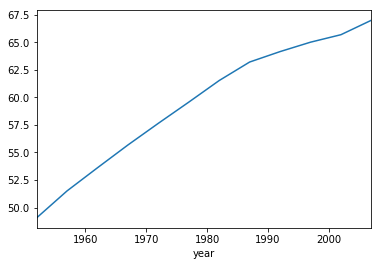

In [159]:
import matplotlib.pyplot as plt
%matplotlib inline

gyle.plot()

In [160]:
gyle

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [161]:
type(gyle)

pandas.core.series.Series

In [162]:
df = gyle.reset_index()

In [163]:
#df.to_csv('../output/lifeExp_by_year.csv', index=False)